In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/JAYANT/Downloads/cardekho_r.csv')

print("Data frame has {}rows and {}columns".format(df.shape[0],df.shape[1]))
df.head()

Data frame has 19974rows and 15columns


,fullname,price,new_price,year,sellertype,kmdriven,ownertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,seats,pricelakh,price_old
0,Maruti Alto Std,120000,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Lower Range,1.20
1,Hyundai Grand i10 Asta,550000,7.11-7.48 Lakh,2016,Individual,20000,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Medium Range,5.50
2,Hyundai i20 Asta,215000,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Lower Range,2.15
3,Maruti Alto K10 2010-2014 VXI,226000,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Lower Range,2.26
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,10.14-13.79 Lakh,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Medium Range,5.70


# Data Cleaning and Preprocessing

# Dropping null values

In [3]:
df.isnull().sum()

fullname                0
price                   0
new_price           10410
year                    0
sellertype              0
kmdriven                0
ownertype               0
fueltype                0
transmissiontype        0
mileage               160
enginecc              110
maxpowerbhp           337
seats                  87
pricelakh               0
price_old               0
dtype: int64

In [4]:
# dropping all except "new_price"

df.dropna(subset=['fullname', 'price', 'year', 'sellertype','kmdriven', 'fueltype', 'transmissiontype', 'mileage', 'enginecc','maxpowerbhp', 'seats'],how='any',axis=0, inplace=True)
#df = df.rename(columns={"new-price":"new_price"})
df.shape


(19542, 15)

# Creating column **"vehicle_age"** from **"year"**

In [5]:
dataset_year=2021
df['vehicle_age'] = dataset_year - df['year']
df.drop(['year'],axis=1, inplace=True)

df.head(1)

,fullname,price,new_price,sellertype,kmdriven,ownertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,seats,pricelakh,price_old,vehicle_age
0,Maruti Alto Std,120000,NaN,Individual,120000,First Owner,Petrol,Manual,19.7,796.0,46.3,5.0,Lower Range,1.2,9


# Creating column **"brand"** & **"model"** from **"full_name"**

In [6]:
# Creating brand
df["fullname"] = df["fullname"].str.replace(" New ", " ")
df['brand']=df.fullname.str.split(' ').str.get(0)
df.loc[(df.brand == 'Land'),'brand']='Land Rover'

# Creating model
df['model']=df['fullname'].apply(lambda x: ' '.join(x.split(' ')[1:3]) if 'Dzire' in x else ''.join(x.split(' ')[1]))

In [7]:
# Renaming car models

df.loc[(df.model == 'Wagon'),'model'] = 'Wagon R'
df.loc[(df.model == 'E'),'model'] = 'E Verito'
df.loc[(df.model == 'Land'),'model'] = 'Land Cruiser'

In [8]:
# Dropping "full_name"

df.drop('fullname',axis = 1, inplace=True)

In [9]:
# Creating column "car_name"

df['car_name'] = df["brand"] +" "+ df["model"]
df_unique= pd.DataFrame(df['car_name'].value_counts())
df.head(1)

,price,new_price,sellertype,kmdriven,ownertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,seats,pricelakh,price_old,vehicle_age,brand,model,car_name
0,120000,NaN,Individual,120000,First Owner,Petrol,Manual,19.7,796.0,46.3,5.0,Lower Range,1.2,9,Maruti,Alto,Maruti Alto


# Converting **"new_price"** into **"min_price"** & **"max_price"**

In [10]:
df['new_price1']=df['new_price'].str.lstrip('New Car (On-Road Price) : Rs.')
df.new_price1 = df.new_price1.str.replace('[*,,]', '')

df[['new_price1','unit']] = df.new_price1.str.split(" ",expand=True)

df[['min_cost_price','max_cost_price']] = df.new_price1.str.split("-",expand=True)
df.min_cost_price = df.min_cost_price.str.replace('[A-Za-z]', '')
df.max_cost_price = df.max_cost_price.str.replace('[A-Za-z]', '')

df.drop(['new_price1'],axis=1)
df.head(1)

,price,new_price,sellertype,kmdriven,ownertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,...,pricelakh,price_old,vehicle_age,brand,model,car_name,new_price1,unit,min_cost_price,max_cost_price
0,120000,NaN,Individual,120000,First Owner,Petrol,Manual,19.7,796.0,46.3,...,Lower Range,1.2,9,Maruti,Alto,Maruti Alto,NaN,NaN,NaN,NaN


In [11]:
# Changing datatype into float

df['max_cost_price'] = df['max_cost_price'].astype('float64', errors = 'raise')
df['min_cost_price'] = df['min_cost_price'].astype('float64', errors = 'raise')

In [12]:
# Converting cost price to appropriate units

df.loc[df.unit == "Lakh", 'min_cost_price'] = df['min_cost_price']*100000.0
df.loc[df.unit == "Lakh", 'max_cost_price'] = df['max_cost_price']*100000.0

df.loc[df.unit == "Cr", 'min_cost_price'] = df['min_cost_price']*10000000.0
df.loc[df.unit == "Cr", 'max_cost_price'] = df['max_cost_price']*10000000.0

df.drop(['unit','new_price1'],axis=1, inplace=True)

In [13]:
# Filling cars whose "max_cost_price" is missing with "min_cost_price"

df['max_cost_price'] = df['max_cost_price'].fillna(df['min_cost_price'])
df.drop(df[(df['max_cost_price'])==(df['min_cost_price'])].index, inplace=True)

In [14]:
#Filling missing cost price of cars with the mean of their respective car models

df['min_cost_price'] = df['min_cost_price'].fillna(df.groupby(['car_name'])['min_cost_price'].transform('mean'))
df['max_cost_price'] = df['max_cost_price'].fillna(df.groupby(['car_name'])['max_cost_price'].transform('mean'))

# Converting **"selling_price"** to appropriate units

In [15]:
print(df.dtypes)


price                 int64
new_price            object
sellertype           object
kmdriven              int64
ownertype            object
fueltype             object
transmissiontype     object
mileage             float64
enginecc            float64
maxpowerbhp         float64
seats               float64
pricelakh            object
price_old           float64
vehicle_age           int64
brand                object
model                object
car_name             object
min_cost_price      float64
max_cost_price      float64
dtype: object


# Removing unwanted non-numeric data from columns

In [16]:
rep_cols = [ "mileage","kmdriven","enginecc","maxpowerbhp","seats"]
df[rep_cols] = df[rep_cols].replace(r'[^\d.]+', '', regex=True)
df[rep_cols]= df[rep_cols].replace('', '0', regex=True)

In [17]:
# Dropping null values
df.dropna(how='any',axis=0, inplace=True)

# Changing datatype to float
df= df.astype({'kmdriven': 'float64', 'mileage': 'float64', 'enginecc': 'float64', 'maxpowerbhp': 'float64', 'seats': 'float64','min_cost_price': 'float64','max_cost_price': 'float64'})
print(df.dtypes)

price                 int64
new_price            object
sellertype           object
kmdriven            float64
ownertype            object
fueltype             object
transmissiontype     object
mileage             float64
enginecc            float64
maxpowerbhp         float64
seats               float64
pricelakh            object
price_old           float64
vehicle_age           int64
brand                object
model                object
car_name             object
min_cost_price      float64
max_cost_price      float64
dtype: object


In [18]:
# Reordering columns

col_order=['car_name','brand','model','min_cost_price','max_cost_price','vehicle_age','kmdriven','sellertype','fueltype','transmissiontype','mileage','enginecc','maxpowerbhp','seats','price']
df=df[col_order]
df.head(1)

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,kmdriven,sellertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,seats,price
1,Hyundai Grand,Hyundai,Grand,711000.0,748000.0,5,20000.0,Individual,Petrol,Manual,18.9,1197.0,82.0,5.0,550000


# Removing Outliers

In [19]:
df.describe()

,min_cost_price,max_cost_price,vehicle_age,kmdriven,mileage,enginecc,maxpowerbhp,seats,price
count,9.160000e+03,9.160000e+03,9160.000000,9.160000e+03,9160.000000,9160.000000,9160.000000,9160.000000,9.160000e+03
mean,7.951080e+06,2.008919e+06,5.723472,5.120436e+04,19.033397,1502.350109,103.535023,5.318450,7.874113e+05
std,7.008802e+07,3.145354e+06,2.987885,5.622241e+04,3.852493,529.385262,43.280976,0.798109,9.351989e+05
min,3.110000e+05,4.360000e+05,0.000000,1.000000e+02,4.000000,796.000000,40.300000,2.000000,4.000000e+04
25%,6.580000e+05,8.770000e+05,3.000000,2.500000e+04,16.470000,1197.000000,81.800000,5.000000,3.982500e+05
50%,9.000000e+05,1.284000e+06,5.000000,4.588300e+04,18.900000,1396.000000,88.730000,5.000000,5.650000e+05
75%,1.309000e+06,1.811000e+06,7.000000,6.700000e+04,21.790000,1591.000000,120.000000,5.000000,8.500000e+05
max,9.880000e+08,9.110000e+07,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [20]:
# Dropping zero valued cells

df.drop(df[df['seats'] == 0].index, inplace = True)
df.drop(df[df['mileage'] == 0].index, inplace = True)
df.drop(df[df['kmdriven'] == 0].index, inplace = True)
df.drop(df[df['vehicle_age'] == 0].index, inplace = True)
df.drop(df[df['maxpowerbhp'] == 0].index, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 1 to 19972
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_name          9156 non-null   object 
 1   brand             9156 non-null   object 
 2   model             9156 non-null   object 
 3   min_cost_price    9156 non-null   float64
 4   max_cost_price    9156 non-null   float64
 5   vehicle_age       9156 non-null   int64  
 6   kmdriven          9156 non-null   float64
 7   sellertype        9156 non-null   object 
 8   fueltype          9156 non-null   object 
 9   transmissiontype  9156 non-null   object 
 10  mileage           9156 non-null   float64
 11  enginecc          9156 non-null   float64
 12  maxpowerbhp       9156 non-null   float64
 13  seats             9156 non-null   float64
 14  price             9156 non-null   int64  
dtypes: float64(7), int64(2), object(6)
memory usage: 1.1+ MB


In [22]:
# Dropping out of boundary values

df.drop(df[(df['vehicle_age'] > 20) ].index, inplace = True)
df.drop(df[df['kmdriven'] >300000 ].index, inplace = True)

In [23]:
# Removing the outliers using Interquartile Range for all columns

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

out_columns = df[['kmdriven','vehicle_age','mileage','enginecc','maxpowerbhp','seats','price','min_cost_price','max_cost_price']]  
for i in out_columns:
    removeOutliers(df, i)
  
# Assigning filtered data back to our original variable'

df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)

IQR value for column kmdriven is: 42000.0
IQR value for column vehicle_age is: 4.0
IQR value for column mileage is: 5.32
IQR value for column enginecc is: 394.0
IQR value for column maxpowerbhp is: 38.2
IQR value for column seats is: 0.0
IQR value for column price is: 451000.0
IQR value for column min_cost_price is: 651000.0
IQR value for column max_cost_price is: 930000.0
Shape of data after outlier removal is:  (8176, 15)


# Final Preprocessing

# Converting **"min_cost_price"** and **"max_cost_price"** to **"avg_cost_price"** using mean

In [24]:
df['avg_cost_price']=(df['min_cost_price']+df['max_cost_price'])/2

In [25]:
df=df.drop(['min_cost_price','max_cost_price'], axis=1)

In [26]:
df['avg_cost_price']=df['avg_cost_price']/100000
df['price']=df['price']/100000

In [27]:
df.head()

,car_name,brand,model,vehicle_age,kmdriven,sellertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,seats,price,avg_cost_price
1,Hyundai Grand,Hyundai,Grand,5,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,5.50,7.295
4,Ford Ecosport,Ford,Ecosport,6,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,5.70,11.965
5,Maruti Wagon R,Maruti,Wagon R,8,35000.0,Individual,Petrol,Manual,18.90,998.0,67.10,5.0,3.50,6.050
6,Hyundai i10,Hyundai,i10,8,40000.0,Dealer,Petrol,Manual,20.36,1197.0,78.90,5.0,3.15,6.585
7,Maruti Wagon R,Maruti,Wagon R,3,17512.0,Dealer,Petrol,Manual,20.51,998.0,67.04,5.0,4.10,6.135


In [28]:
# Dropping Hyundai Aura Hyundai Aura
df.drop(df[df['car_name']=='Hyundai Aura'].index, axis=0,  inplace=True,)


# Model Creation


In [29]:
vehicles=df.copy()
vehicles=vehicles.drop(['car_name'], axis=1)
vehicles.head()

,brand,model,vehicle_age,kmdriven,sellertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,seats,price,avg_cost_price
1,Hyundai,Grand,5,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,5.50,7.295
4,Ford,Ecosport,6,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,5.70,11.965
5,Maruti,Wagon R,8,35000.0,Individual,Petrol,Manual,18.90,998.0,67.10,5.0,3.50,6.050
6,Hyundai,i10,8,40000.0,Dealer,Petrol,Manual,20.36,1197.0,78.90,5.0,3.15,6.585
7,Maruti,Wagon R,3,17512.0,Dealer,Petrol,Manual,20.51,998.0,67.04,5.0,4.10,6.135


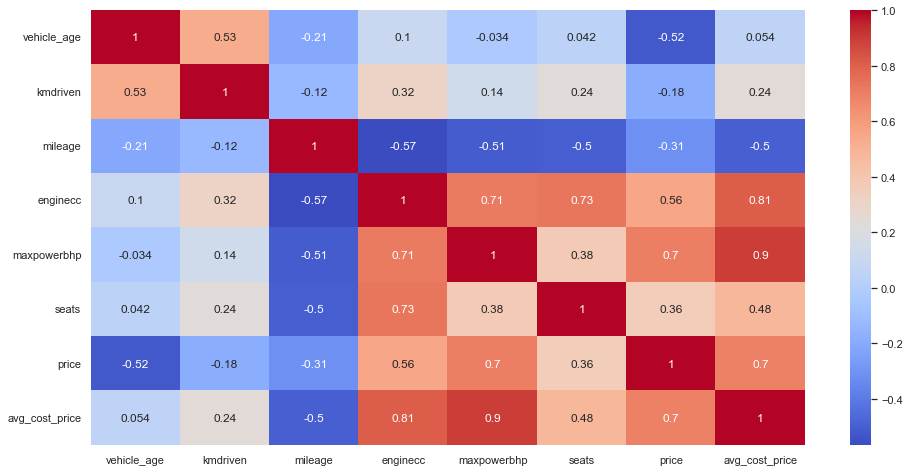

In [30]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(vehicles.corr(), annot=True, fmt='.2g', cmap="coolwarm")
plt.show()

In [31]:
numeric = vehicles[vehicles.select_dtypes(include=['number']).columns]
numeric = numeric.drop(['price'],axis=1)
numy=vehicles['price']

In [32]:
vehicles1=vehicles.copy()

In [33]:
vehicles1.head()

,brand,model,vehicle_age,kmdriven,sellertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,seats,price,avg_cost_price
1,Hyundai,Grand,5,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,5.50,7.295
4,Ford,Ecosport,6,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,5.70,11.965
5,Maruti,Wagon R,8,35000.0,Individual,Petrol,Manual,18.90,998.0,67.10,5.0,3.50,6.050
6,Hyundai,i10,8,40000.0,Dealer,Petrol,Manual,20.36,1197.0,78.90,5.0,3.15,6.585
7,Maruti,Wagon R,3,17512.0,Dealer,Petrol,Manual,20.51,998.0,67.04,5.0,4.10,6.135


In [103]:
# vehicles1=pd.get_dummies(vehicles1,columns=['fueltype','transmissiontype','sellertype','brand','model'],drop_first=True)
# vehicles1.head()

,vehicle_age,kmdriven,mileage,enginecc,maxpowerbhp,seats,price,avg_cost_price,fueltype_Diesel,fueltype_Petrol,...,model_Vitara,model_WR-V,model_Wagon R,model_XL6,model_XUV300,model_XUV500,model_Yaris,model_i10,model_i20,model_redi-GO
1,5,20000.0,18.90,1197.0,82.00,5.0,5.50,7.295,0,1,...,0,0,0,0,0,0,0,0,0,0
4,6,30000.0,22.77,1498.0,98.59,5.0,5.70,11.965,1,0,...,0,0,0,0,0,0,0,0,0,0
5,8,35000.0,18.90,998.0,67.10,5.0,3.50,6.050,0,1,...,0,0,1,0,0,0,0,0,0,0
6,8,40000.0,20.36,1197.0,78.90,5.0,3.15,6.585,0,1,...,0,0,0,0,0,0,0,1,0,0
7,3,17512.0,20.51,998.0,67.04,5.0,4.10,6.135,0,1,...,0,0,1,0,0,0,0,0,0,0


In [34]:
vehicles1.drop(['brand', 'model'], axis=1, inplace=True)


In [35]:
s=pd.factorize(vehicles1['sellertype'])[0]
vehicles1['sellertype']=s
s=pd.factorize(vehicles1['fueltype'])[0]
vehicles1['fueltype']=s
s=pd.factorize(vehicles1['transmissiontype'])[0]
vehicles1['transmissiontype']=s
vehicles1.head()

,vehicle_age,kmdriven,sellertype,fueltype,transmissiontype,mileage,enginecc,maxpowerbhp,seats,price,avg_cost_price
1,5,20000.0,0,0,0,18.90,1197.0,82.00,5.0,5.50,7.295
4,6,30000.0,1,1,0,22.77,1498.0,98.59,5.0,5.70,11.965
5,8,35000.0,0,0,0,18.90,998.0,67.10,5.0,3.50,6.050
6,8,40000.0,1,0,0,20.36,1197.0,78.90,5.0,3.15,6.585
7,3,17512.0,1,0,0,20.51,998.0,67.04,5.0,4.10,6.135


In [36]:
from sklearn.model_selection import train_test_split

X=vehicles1.drop(columns=['price'],axis=1)
y=vehicles1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [37]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6540, 10)
x test:  (1635, 10)
y train:  (6540,)
y test:  (1635,)


In [53]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 540)#341.93.98984383403094 %- 280#540
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=540)

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameters to search through
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=111), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Use the best parameters to create a new model
clf = RandomForestRegressor(**best_params, random_state=111)

# Train the model with the best parameters on the training dataset
clf.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200,
                      random_state=111)

In [59]:
y_pred = clf.predict(X_test)

In [60]:
print('\nAccuracy: \n', clf.score(X_test,y_test)*100,"%")


Accuracy: 
 93.95906153416274 %


In [63]:
import pickle
file = open('file.pkl','wb')
pickle.dump(clf,file)

In [109]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

0.5492551657968455

In [110]:
metrics.r2_score(y_test, y_pred)

0.9410620771448394

In [111]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
rmse

0.630357434531478


0.7939505239821169

In [112]:
ytest=y_test.to_numpy()
xtest=X_test.to_numpy()

In [113]:
from tabulate import tabulate
testdata=[['Sr. No.','Actual Price','Predicted Price','Difference','Percentage Change%']]
c=1
for i in range(0,len(y_pred)):
    testdata.append([c,ytest[i],y_pred[i],y_pred[i]-ytest[i],((y_pred[i]-ytest[i])/abs(ytest[i]))*100])
    c+=1
print(tabulate(testdata,headers='firstrow',tablefmt=''))

  Sr. No.    Actual Price    Predicted Price    Difference    Percentage Change%
---------  --------------  -----------------  ------------  --------------------
        1            8.2            8.39315    0.193148               2.35547
        2            2.6            2.42461   -0.175389              -6.74573
        3            5.5            5.68874    0.188741               3.43165
        4           14.76          10.4306    -4.32935              -29.3317
        5           22.25          19.5233    -2.72671              -12.2549
        6            3.95           3.43921   -0.510787             -12.9313
        7            3.7            6.37196    2.67196               72.215
        8            6.35           6.52725    0.177247               2.79129
        9            4.5            4.29035   -0.209648              -4.65885
       10            8.5            7.13594   -1.36406              -16.0477
       11            5.75           8.20339    2.45339          

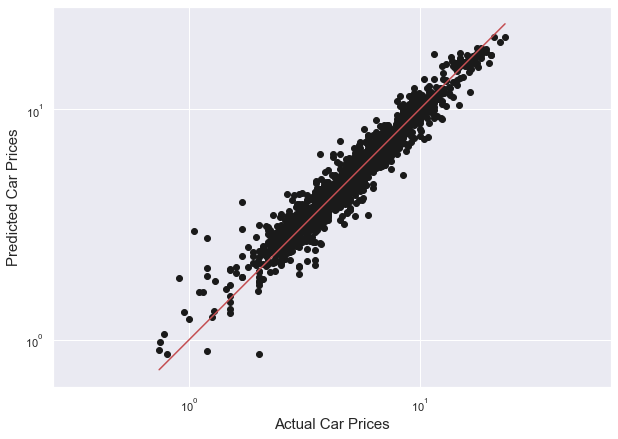

In [114]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred, c='k')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r')
plt.xlabel('Actual Car Prices', fontsize=15)
plt.ylabel('Predicted Car Prices', fontsize=15)
plt.axis('equal')
plt.show()